In [9]:
from os.path import join, splitext, basename
import geopandas as gpd
from shapely.ops import transform
from glob import glob
import leafmap.foliumap as leafmap
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:
save_dir = "../regions/shapes/"
os.makedirs(save_dir, exist_ok=True)

In [11]:
shapefile_path="/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/raw_data/raw_shapefile/bangladesh_division/bgd_admbnda_adm1_bbs_20180410.shp"

df = gpd.read_file(shapefile_path).to_crs(epsg=4326)
# df['District'] = df['District'].str.replace('>', 'A')
# df['STATE'] = df['STATE'].str.replace('>', 'A')
# df['District'] = df['District'].str.replace('|', 'I')
#make it lowercase
df['ADM1_EN']= df['ADM1_EN'].str.lower()
display(df.head())


,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,25.424604,0.889395,barisal,10,None,None,None,Bangladesh,BD,2015-01-01,2018-04-10,0000/00/00,"MULTIPOLYGON (((90.47753 21.76919, 90.4764 21...."
1,30.287321,2.737796,chittagong,20,None,None,None,Bangladesh,BD,2015-01-01,2018-04-10,0000/00/00,"MULTIPOLYGON (((92.32719 20.63543, 92.32749 20..."
2,12.197758,1.806506,dhaka,30,None,None,None,Bangladesh,BD,2015-01-01,2018-04-10,0000/00/00,"MULTIPOLYGON (((90.45673 23.00396, 90.45631 23..."
3,38.409385,1.826575,khulna,40,None,None,None,Bangladesh,BD,2015-01-01,2018-04-10,0000/00/00,"MULTIPOLYGON (((89.24623 21.68914, 89.2484 21...."
4,8.166577,0.941812,mymensingh,45,None,None,None,Bangladesh,BD,2015-01-01,2018-04-10,0000/00/00,"POLYGON ((89.76844 25.43233, 89.76857 25.43221..."


In [12]:
dataframe=df[['ADM1_EN','geometry']]
dataframe

,ADM1_EN,geometry
0,barisal,"MULTIPOLYGON (((90.47753 21.76919, 90.4764 21...."
1,chittagong,"MULTIPOLYGON (((92.32719 20.63543, 92.32749 20..."
2,dhaka,"MULTIPOLYGON (((90.45673 23.00396, 90.45631 23..."
3,khulna,"MULTIPOLYGON (((89.24623 21.68914, 89.2484 21...."
4,mymensingh,"POLYGON ((89.76844 25.43233, 89.76857 25.43221..."
5,rajshahi,"POLYGON ((89.02818 25.27743, 89.02833 25.27742..."
6,rangpur,"MULTIPOLYGON (((89.51742 26.0265, 89.51753 26...."
7,sylhet,"MULTIPOLYGON (((91.30353 23.99673, 91.30344 23..."


In [13]:
#access the geometry of rajshahi
region='barisal'
rajshahi = dataframe[dataframe['ADM1_EN']==region]
rajshahi.reset_index(drop=True, inplace=True)
rajshahi

,ADM1_EN,geometry
0,barisal,"MULTIPOLYGON (((90.47753 21.76919, 90.4764 21...."


In [14]:
rajshahi.to_file(join(save_dir,f"{region}.geojson"), driver='GeoJSON')
print("Saved to file")

Saved to file


In [15]:
m = leafmap.Map()
m.add_basemap("HYBRID")
m.add_gdf(rajshahi, layer_name=f"{region}")
display(m)

In [13]:
## print all up districts which comes underncr region
ncr_districts = ['ALWAR','BHARATPUR']
ncr_df = df[df['District'].isin(ncr_districts)]
display(len(ncr_df))

2

<Axes: >

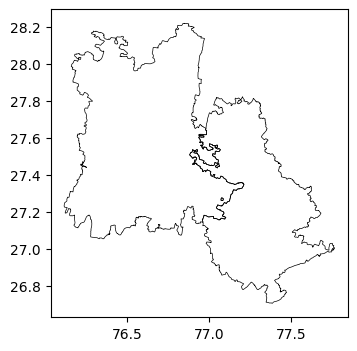

In [14]:
fig, ax = plt.subplots(figsize=(4, 4))
ncr_df.plot(ax=ax, color="none", edgecolor="black", linewidth=0.5)

In [15]:
m = leafmap.Map()
m.add_basemap("HYBRID")
m.add_gdf(ncr_df, layer_name="NCR Districts")
display(m)

In [17]:
ncr_df['District']='ALWAR'
ncr_df

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
20,ALWAR,RAJASTHAN,None,8,87,908983.518749,8.091212e+09,"POLYGON ((76.85108 28.22115, 76.85219 28.22098..."
63,ALWAR,RAJASTHAN,None,8,91,731664.143421,4.881166e+09,"MULTIPOLYGON (((77.07565 27.27704, 77.07819 27..."
